    Analysis of the Relationship between GDP and Malnutrition

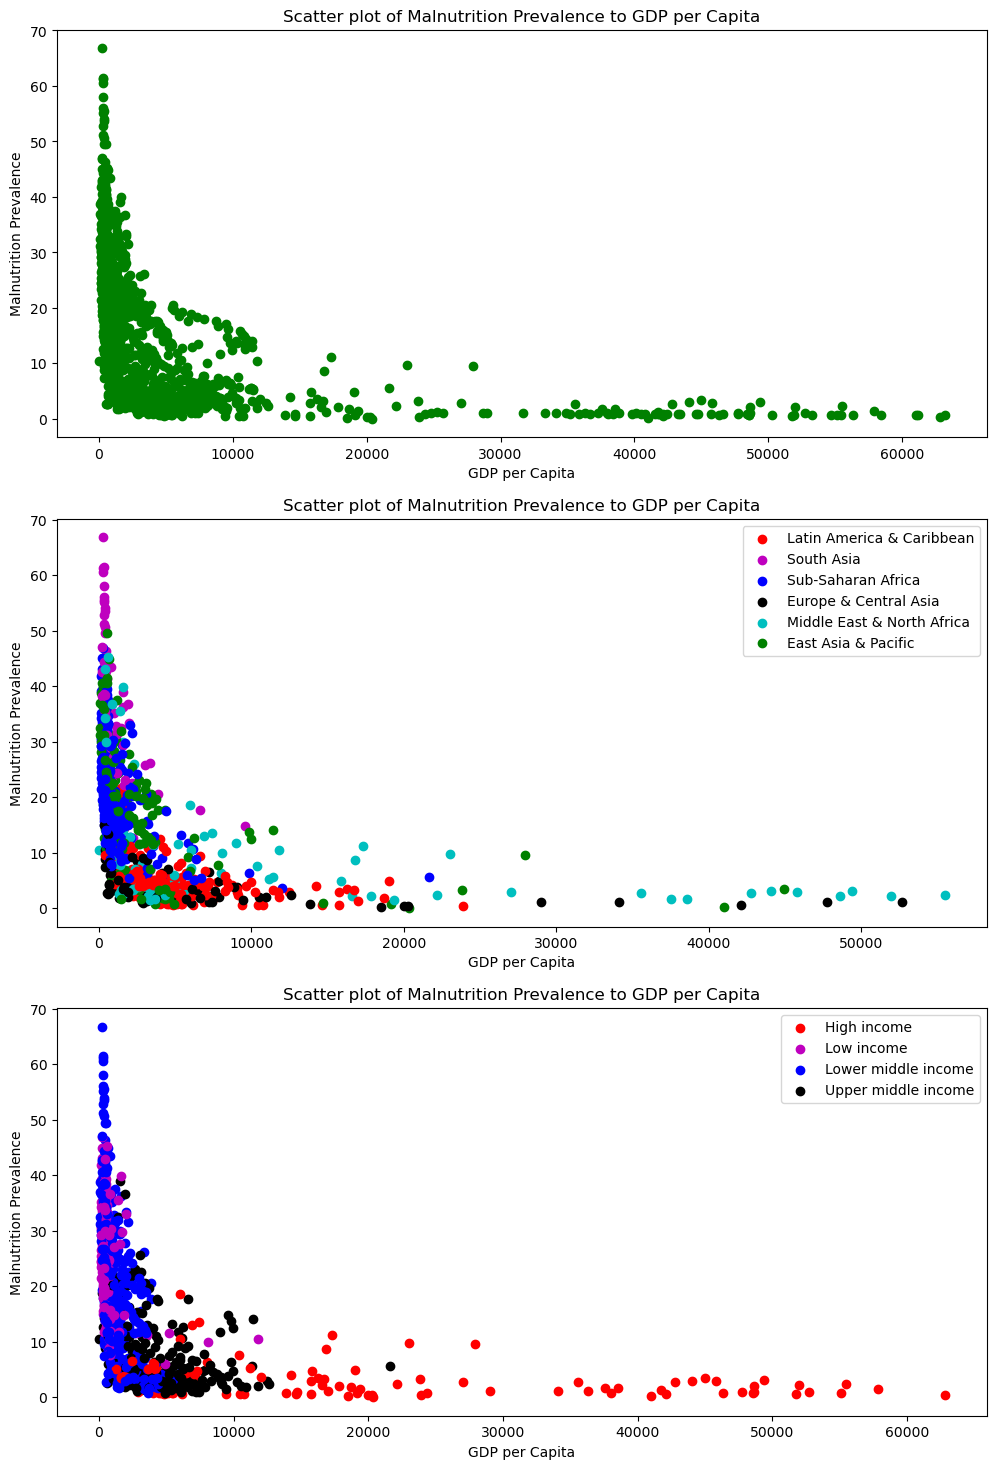

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading or Reading of Data
gdp_data = pd.read_excel("API_NY.GDP.PCAP.CD_DS2_en_excel_v2_4521843.xls", sheet_name = "Data")
maln_data = pd.read_excel("API_SH.STA.MALN.ZS_DS2_en_excel_v2_4499574.xls", sheet_name = "Data")
gdpMet = pd.read_excel("API_NY.GDP.PCAP.CD_DS2_en_excel_v2_4521843.xls", sheet_name="Metadata - Countries") # GDP Metadata
malnMet = pd.read_excel("API_SH.STA.MALN.ZS_DS2_en_excel_v2_4499574.xls", sheet_name="Metadata - Countries") # MALN Metadata

# Data Cleanup
gdp_data.drop([0,1], inplace=True) # removes redundant rows 
gdp_data.columns = gdp_data.iloc[0,:]
gdp_data.columns.name = "" # resetting our column name to empty string
gdp_data.drop([2], inplace=True) # removing another cumbersome row
gdp_data.index = np.arange(len(gdp_data.index)) # renaming our index to start from 0

maln_data.drop([0,1], inplace=True) # removes redundant rows 
maln_data.columns = maln_data.iloc[0,:]
maln_data.columns.name = "" # resetting our column name to empty string
maln_data.drop([2], inplace=True) # removing another cumbersome row
maln_data.index = np.arange(len(maln_data.index)) # renaming our index to start from 0

# Plot Setup
fig,ax=plt.subplots(3,1,figsize=(12,18))
ax[0].set_title('Scatter plot of Malnutrition Prevalence to GDP per Capita') # Setting title of the first graph plot
ax[0].set_xlabel("GDP per Capita") # Setting label of x-axis for the first graph plot
ax[0].set_ylabel("Malnutrition Prevalence") # Setting label of y-axis for the first graph plot

ax[1].set_title('Scatter plot of Malnutrition Prevalence to GDP per Capita') # Setting title of the second graph plot
ax[1].set_xlabel("GDP per Capita") # Setting label of x-axis for the second graph plot
ax[1].set_ylabel("Malnutrition Prevalence") # Setting label of y-axis for the second graph plot

ax[2].set_title('Scatter plot of Malnutrition Prevalence to GDP per Capita') # Setting title of the third graph plot
ax[2].set_xlabel("GDP per Capita") # Setting label of x-axis for the third graph plot
ax[2].set_ylabel("Malnutrition Prevalence") # Setting label of y-axis for the third graph plot

# GRAPH 1: To plot Malnutrition Data for all countries and years against GDP per capita
date_loop = gdp_data.columns[4:] # list of all dates to be used for looping purposes
for i in range(len(date_loop)):
    ax[0].scatter(gdp_data.loc[:,date_loop[i]], maln_data.loc[:,date_loop[i]], color='g')

# GRAPH 2: To plot Malnutrition against GDP based on region
gdp_region = pd.merge(gdp_data, gdpMet, on="Country Code", how="outer") # merging the region data column with gdp_data
maln_region = pd.merge(maln_data, malnMet, on="Country Code", how="outer") # merging the region data column with maln_data
region = gdp_region.loc[:,"Region"].tolist()
#print(region)

#print(gdp_region)
color_region = ['r','m','b','k','c','g'] # list of colors to indicate each region on the graph

# Graph plot of Malnutrition against GDP for each region 
for i in range(len(gdp_region.index)):
    # The following conditional statements check the region for each country before plotting
    if region[i] == "Latin America & Caribbean":
        color = color_region[0]
    elif region[i] == "South Asia":
        color = color_region[1]
    elif region[i] == "Sub-Saharan Africa":
        color = color_region[2]
    elif region[i] == "Europe & Central Asia":
        color = color_region[3]
    elif region[i] == "Middle East & North Africa":
        color = color_region[4]
    elif region[i] == "East Asia & Pacific":
        color = color_region[5]
    else:
        continue
    if region[i] == "North America":
        continue
    else:
        ax[1].scatter(gdp_region.loc[i,1960.0:2021.0], maln_region.loc[i,1960.0:2021.0], label=region[i], color=color)


# Setting of label list in legend function to correctly plot legends for each function
handles, labels = ax[1].get_legend_handles_labels()
handleList, labelList = [], []
for handle, label in zip(handles, labels):
    if label not in labelList:
        handleList.append(handle)
        labelList.append(label)
    
ax[1].legend(handleList, labelList)


# GRAPH 3: 
gdp_income = gdp_region.copy() # merging the region data column with gdp_data
maln_income = maln_region.copy() # merging the region data column with maln_data
income = gdp_income.loc[:,"IncomeGroup"].tolist() # generating a list of income groups

color_income = ['r','m','b','k'] # list of colors to show legends appropriate to each income level

# Graph plot of Malnutrition against GDP for each income level
for i in range(len(gdp_income.index)):
    # The if conditional statements plots each country based on the income
    if income[i] == "High income":
        color = color_income[0]
    elif income[i] == "Low income":
        color = color_income[1]
    elif income[i] == "Lower middle income":
        color = color_income[2]
    elif income[i] == "Upper middle income":
        color = color_income[3]
    else:
        continue
    ax[2].scatter(gdp_income.loc[i,1960.0:2021.0], maln_income.loc[i,1960.0:2021.0], label=income[i], color=color)


# Setting of label list in legend function to correctly plot legends for each function    
handles, labels = ax[2].get_legend_handles_labels()
handleList, labelList = [], []
for handle, label in zip(handles, labels):
    if label not in labelList:
        handleList.append(handle)
        labelList.append(label)

    
ax[2].legend(handleList, labelList)

Extracting Commodity Prices and Performing an Analysis on them

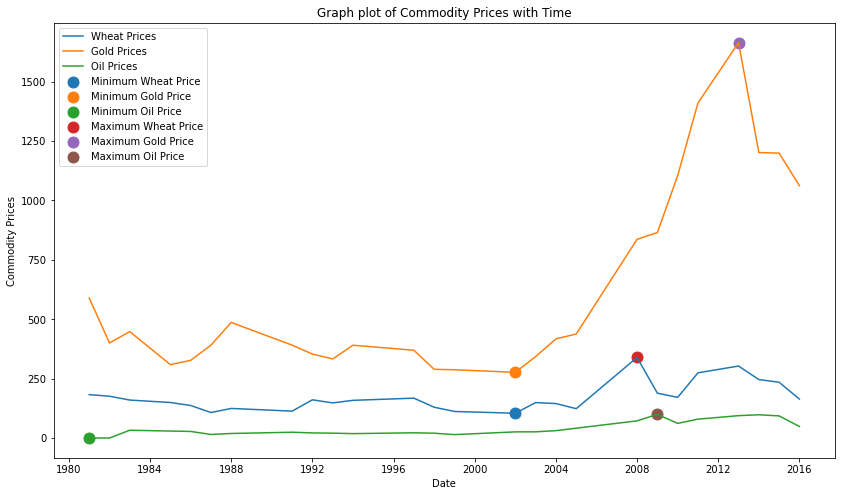

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import quandl

quandl.ApiConfig.api_key = '5qgQ_s6RoVGUwXjRzc9o'
wheat_data = quandl.get("ODA/PWHEAMT_USD") # Wheat Prices
oil_data = quandl.get('WGEC/WLD_CRUDE_WTI') # Oil Prices
gold_data = quandl.get('BUNDESBANK/BBK01_WT5511') # Gold Prices

#print(wheat_data) # varies monthly
#print(oil_data) # varies yearly
#print(gold_data) # varies daily

df = pd.merge(gold_data, wheat_data, on="Date")
commodity_price = df.merge(oil_data, on = "Date")
commodity_price.columns = ["Gold Prices", "Wheat Prices", "Oil Prices"]

# Obtaining the minimum and maximum prices for each commodity
min_wheat = commodity_price.loc[:,'Wheat Prices'].min()
min_gold = commodity_price.loc[:,'Gold Prices'].min()
min_oil = commodity_price.loc[:,'Oil Prices'].min()
max_wheat = commodity_price.loc[:,'Wheat Prices'].max()
max_gold = commodity_price.loc[:,'Gold Prices'].max()
max_oil = commodity_price.loc[:,'Oil Prices'].max()

# Obtaining the index for the minimum and maximum prices for each commodity
minidx_wheat = commodity_price.loc[:,'Wheat Prices'].idxmin()
minidx_gold = commodity_price.loc[:,'Gold Prices'].idxmin()
minidx_oil = commodity_price.loc[:,'Oil Prices'].idxmin()
maxidx_wheat = commodity_price.loc[:,'Wheat Prices'].idxmax()
maxidx_gold = commodity_price.loc[:,'Gold Prices'].idxmax()
maxidx_oil = commodity_price.loc[:,'Oil Prices'].idxmax()

fig, ax = plt.subplots(figsize=(14,8))
ax.set_title("Graph plot of Commodity Prices with Time") # Setting the title of the graph
ax.set_xlabel("Date") # Setting the label of the x-axis on the graph
ax.set_ylabel("Commodity Prices") # Setting the label of the y-axis on the graph


# Plotting the synchronized graphs for each commodity
ax.plot(commodity_price.index, commodity_price.loc[:,'Wheat Prices'], label = 'Wheat Prices')
ax.plot(commodity_price.index, commodity_price.loc[:,'Gold Prices'], label = 'Gold Prices')
ax.plot(commodity_price.index, commodity_price.loc[:,'Oil Prices'], label = 'Oil Prices')

# Plotting of the maximum and minimum prices for each commodity
ax.scatter(minidx_wheat, min_wheat, label= "Minimum Wheat Price", s=120)
ax.scatter(minidx_gold, min_gold, label= "Minimum Gold Price", s=120)
ax.scatter(minidx_oil, min_oil, label= "Minimum Oil Price", s=120)
ax.scatter(maxidx_wheat, max_wheat, label= "Maximum Wheat Price", s=120)
ax.scatter(maxidx_gold, max_gold, label= "Maximum Gold Price", s=120)
ax.scatter(maxidx_oil, max_oil, label= "Maximum Oil Price", s=120)

ax.legend(loc='best')

Summary Statistics of a given Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importation of data
co2_import = pd.read_excel("API_EN.ATM.CO2E.PC_DS2_en_excel_v2_4499478.xls", sheet_name = "Data")

# Data Cleanup
co2_import = co2_import.drop([0,1]) # dropping unnecessary columns
co2_import.columns = co2_import.iloc[0] # setting the columns for the co2_import dataset
co2_import = co2_import.drop([2])
co2_import.index = np.arange(len(co2_import)) # resetting the index
co2_import.columns.name= "" # Resetting name of columns

# Data Extraction for the year 2010
co2_data = co2_import.loc[:,2010.0] 

# Summary statistics
sum_stat = co2_data.describe() # obtaining a rough summary statistics with the describe() function
sum_stat = sum_stat.drop(["count", "min", "50%", "max"]) # dropping unnecessary rows from the summary statistics

# obtaining the median, 5th percentile and 95th percentile for the co2_import dataset
median = co2_data.median()
percentile5= co2_data.quantile(0.05)
percentile95 = co2_data.quantile(0.95)

add_series = pd.Series([percentile5, percentile95, median])
add_series.index=["5%", "95%", "median"]
add_series.name="extra stats"

# Collecting the summary statistics into one dataframe
sum_stat = pd.concat([sum_stat, add_series])
sum_stat = sum_stat.reindex(index = ['mean','median','std','5%','25%','75%','95%'])
print(sum_stat)


# Generating Summary Statistics for School Enrollment
# importation of data for school enrollment
school_import = pd.read_excel("API_SE.PRM.NENR_DS2_en_excel_v2_4523381.xls", sheet_name = "Data")

# Data Cleanup
school_import = school_import.drop([0,1]) # dropping unnecesary columns
school_import.columns = school_import.iloc[0] # selecting column names
school_import = school_import.drop([2])
school_import.index = np.arange(len(co2_import)) # resetting the index
school_import.columns.name= ""

# Data Extraction for the year 2010- on School Enrollment
school_data = school_import.loc[:,2010.0]

# Summary statistics
school_stat = school_data.describe() # rough summary statistics with describe()
school_stat = school_stat.drop(["count", "min", "50%", "max"]) # dropping of unnecesary rows in summary statistics dataframe

# obtaining the median, 5th percentile and 95th percentile 
median_sch = school_data.median()
percentile5_sch= school_data.quantile(0.05)
percentile95_sch = school_data.quantile(0.95)

add_series2 = pd.Series([percentile5_sch, percentile95_sch, median_sch])
add_series2.index=["5%", "95%", "median"]
add_series2.name="extra stats"

# Collecting of summary statistics into one dataframe
school_stat = pd.concat([school_stat, add_series2])
school_stat = school_stat.reindex(index = ['mean','median','std','5%','25%','75%','95%'])
print(school_stat)

mean       4.333087
median     2.682569
std        5.016823
5%         0.112875
25%        0.721447
75%        6.084064
95%       15.510796
dtype: float64
mean      90.105088
median    92.956725
std        9.527627
5%        66.656820
25%       87.801005
75%       95.934427
95%       98.872787
dtype: float64


Analysis of GDP and Fertility

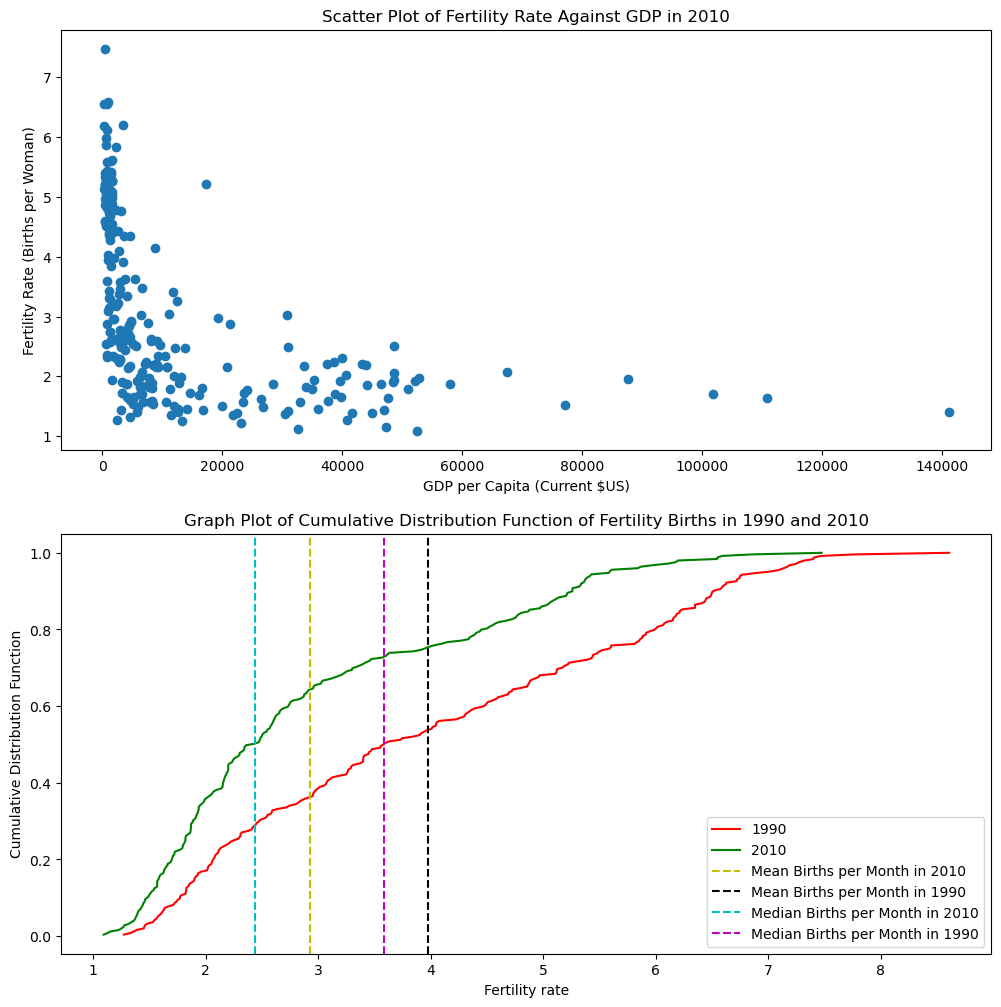

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Importation
gdp_data = pd.read_excel("API_NY.GDP.PCAP.CD_DS2_en_excel_v2_4521843.xls", sheet_name="Data") # importation of gdp data
fertility_data = pd.read_excel("API_SP.DYN.TFRT.IN_DS2_en_excel_v2_4521929.xls", sheet_name="Data") # importation of fertiltiy data

# Data Cleanup
fertility_data = fertility_data.drop([0,1]) # dropping unnecesary rows in fertility data
fertility_data.columns = fertility_data.loc[2] # setting the correct name for the fertility data columns
fertility_data.columns.name = ""
fertility_data = fertility_data.drop([2]) # dropping an unnecssary row

fertility_data.index = np.arange(len(fertility_data)) # resetting the index for fertility data
fertility_data = fertility_data.loc[:, ["Country Name", 1990.0, 2010.0]] # extraction of needed columns

gdp_data = gdp_data.drop([0,1]) # dropping unnecesary rows in gdp data
gdp_data.columns = gdp_data.loc[2] # setting the correct name for the gdp data columns
gdp_data.columns.name = ""
gdp_data = gdp_data.drop([2]) # dropping an unnecssary row
gdp_data.index = np.arange(len(gdp_data)) # resetting the index for gdp data
gdp_data = gdp_data.loc[:, ["Country Name", 1990.0, 2010.0]] # extraction of needed columns

# GRAPH 1: Graph plot of Fertility Rate against GDP in 2010
fig, ax = plt.subplots(2,1,figsize=(12,12))
ax[0].set_title('Scatter Plot of Fertility Rate Against GDP in 2010') # setting the title of the graph
ax[0].set_xlabel("GDP per Capita (Current $US)") # setting the label of the x-axis
ax[0].set_ylabel("Fertility Rate (Births per Woman)") # setting the label of the y-axis

ax[0].scatter(gdp_data.loc[:,2010.0], fertility_data.loc[:,2010.0]) # plotting gdp against fertility

# GRAPH 2: Graph plot of Cumulative Distribution Function of Fertility Rate against GDP in 1990 and 2020

# Extraction of fertility data for 1990
fertility1990 = fertility_data.loc[:,1990.0] 
fert_1990 = fertility1990.to_frame()
fert_1990 = fert_1990.rename(columns={1990.0: 'births per woman'})

# Extraction of fertility data for 2010
fertility2010 = fertility_data.loc[:,2010.0]
fert_2010 = fertility2010.to_frame()
fert_2010 = fert_2010.rename(columns={2010.0: 'births per woman'})

# Creating a dataframe to count the fertility rate in 1990
stats_1990 = fert_1990.groupby('births per woman')
stats_1990 = stats_1990['births per woman'].agg('count') # counting of the fertility rate in 1990
stats_1990 = pd.DataFrame(stats_1990)
stats_1990 = stats_1990.rename(columns = {'births per woman': 'frequency'}) # renaming the newly created dataframe.


# Calculation of the probability and cumulative distribution function
stats_1990["Probability Distribution Function"] = stats_1990['frequency']/sum(stats_1990['frequency'])
stats_1990["Cumulative Distribution Function"] = stats_1990['Probability Distribution Function'].cumsum()

# Creating a dataframe to count the fertility rate in 1990
stats_2010 = fert_2010.groupby('births per woman')
stats_2010 = stats_2010['births per woman'].agg('count') # counting of the fertility rate in 2010
stats_2010 = pd.DataFrame(stats_2010)
stats_2010 = stats_2010.rename(columns = {'births per woman': 'frequency'}) # renaming the newly created dataframe.


# Calculation of the probability and cumulative distribution function
stats_2010["Probability Distribution Function"] = stats_2010['frequency']/sum(stats_2010['frequency'])
stats_2010["Cumulative Distribution Function"] = stats_2010['Probability Distribution Function'].cumsum()

mean2010 = fert_2010.mean()['births per woman'] # mean fertility in 2010
median2010 = fert_2010.median()['births per woman'] # median fertility in 2010

mean1990 = fert_1990.mean()['births per woman'] # mean fertility in 1990
median1990 = fert_1990.median()['births per woman'] #median fertility in 1990

ax[1].set_title('Graph Plot of Cumulative Distribution Function of Fertility Births in 1990 and 2010') # Setting title of graph
ax[1].set_xlabel("Fertility rate") # setting the label of the x-axis
ax[1].set_ylabel("Cumulative Distribution Function") # setting the label of the y-axis

# Plotting cumulative distribution function for 1990 and 2010
ax[1].plot(stats_1990.index, stats_1990["Cumulative Distribution Function"], color='r', label='1990')
ax[1].plot(stats_2010.index, stats_2010["Cumulative Distribution Function"], color='g', label="2010")

# Indication of the mean and median values using a vertical line on the graph plot
ax[1].axvline(mean2010,label="Mean Births per Month in 2010", linestyle='dashed', color='y')
ax[1].axvline(mean1990,label="Mean Births per Month in 1990", linestyle='dashed', color='k')
ax[1].axvline(median2010,label="Median Births per Month in 2010", linestyle='dashed', color='c')
ax[1].axvline(median1990,label="Median Births per Month in 1990", linestyle='dashed', color='m')

ax[1].legend()



Analysis of the relationship between HPI and CPI

C:\Users\kevin\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


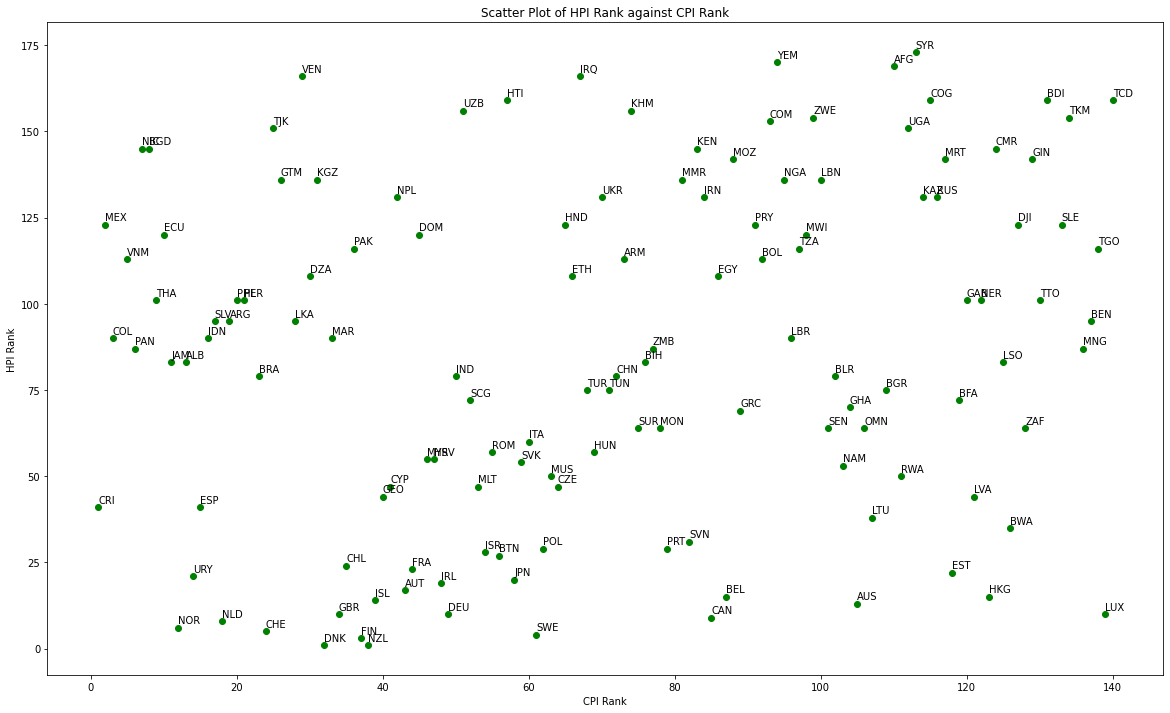

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importation of Data
hpi = pd.read_excel("hpi-data-2016.xlsx", sheet_name = "Complete HPI data")
cpi = pd.read_excel("CPI2016_Results.xlsx", sheet_name="CPI 2015-2016")

# Data Cleanup and Extraction
hpi = hpi.drop([0,1,2,3]) # removal of unnecesary rows
hpi.columns = hpi.loc[4,:] # Naming our columns
hpi.columns.name=""
hpi =  hpi.drop([4]) # removal of an unnecessary row
hpi = hpi[["Country","HPI Rank"]] # extraction of the needed columns
hpi = hpi.iloc[:140,:] # removal of the unnecessary rows

cpi = cpi.loc[:,["Country", "CPI 2016 Rank", "WB Code"]]

frame = pd.merge(cpi, hpi, on="Country") # creating a frame with relevant data
country_code = frame.loc[:,"WB Code"].tolist() # list having text that indicates country abbreviation
#print(len(country_code))
#print(frame)

# GRAPH PLOT
fig, ax = plt.subplots(figsize=(20,12))

ax.set_title("Scatter Plot of HPI Rank against CPI Rank") # Title of the scatter plot
ax.set_ylabel("HPI Rank") # Setting the label of the y-axis
ax.set_xlabel("CPI Rank") # Setting the label of the x-axis
ax.scatter(frame.loc[:,"HPI Rank"], frame.loc[:, "CPI 2016 Rank"], color='g')

# annotating the points corresponding to the various countries
for i in range(len(frame.index)):
    ax.annotate(country_code[i], (frame.loc[:,"HPI Rank"][i], frame.loc[:, "CPI 2016 Rank"][i] + 1.2)) 

